<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [31]:
# Write your code here
import nltk
from nltk import ngrams
from nltk import bigrams, FreqDist
from nltk import pos_tag
from nltk import RegexpParser
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import pandas as pd
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Reading the move reviews csv file dataset 
dataset =pd.read_csv('film_reviews.csv')


# Function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word.isalnum() and word not in stop_words]

    return words

# Function to calculate N-gram frequencies
def calculate_ngram_frequencies(texts, n):
    ngram_freq = FreqDist()

    for text in texts:
        words = preprocess_text(text)
        ngrams_list = list(ngrams(words, n))
        ngram_freq.update(ngrams_list)

    return ngram_freq

# Function to calculate bigram probabilities

def calculate_bigram_probabilities(texts):
    # Tokenize the texts
    tokenized_texts = [word_tokenize(text) for text in texts]

    # Create bigrams
    all_bigrams = [bigram for sublist in tokenized_texts for bigram in bigrams(sublist)]

    # Calculate bigram frequencies
    bigram_freq = FreqDist(all_bigrams)

    # Calculate unigram frequencies
    unigram_freq = FreqDist([word for sublist in tokenized_texts for word in sublist])

    bigram_probabilities = {}
    for bigram in bigram_freq:
        w1, w2 = bigram
        probability = bigram_freq[bigram] / unigram_freq[w1]
        bigram_probabilities[bigram] = probability

    return bigram_probabilities


# Function to extract noun phrases
def extract_noun_phrases(text):
    words = preprocess_text(text)

    # Part-of-speech tagging
    pos_tags = pos_tag(words)

    # Define a grammar for noun phrases
    grammar = r"""
        NP: {<DT>?<JJ>*<NN>}   # Chunk sequences of DT, JJ, NN
    """
    chunk_parser = RegexpParser(grammar)
    tree = chunk_parser.parse(pos_tags)

    # Extract noun phrases
    noun_phrases = [" ".join([token for token, tag in subtree.leaves()]) for subtree in tree.subtrees() if subtree.label() == 'NP']

    return noun_phrases

# Function to calculate relative probabilities of noun phrases
def calculate_relative_probabilities(texts):
    all_noun_phrases = []
    relative_probabilities = []

    for text in texts:
        noun_phrases = extract_noun_phrases(text)
        all_noun_phrases.extend(noun_phrases)

    max_freq = FreqDist(all_noun_phrases).most_common(1)[0][1]

    for text in texts:
        noun_phrases = extract_noun_phrases(text)
        freq_dist = FreqDist(noun_phrases)
        relative_probabilities.append({phrase: freq / max_freq for phrase, freq in freq_dist.items()})

    return relative_probabilities

# Main part of the script
# (1) Count the frequency of all the N-grams (N=3)
trigram_freq = calculate_ngram_frequencies(dataset['Review Text'], 3)

# (2) Calculate the probabilities for all the bigrams in the dataset
bigram_probabilities = calculate_bigram_probabilities(dataset['Review Text'])

# (3) Extract all the noun phrases and calculate relative probabilities
relative_probabilities = calculate_relative_probabilities(dataset['Review Text'])

# Print the results
print("(1) Trigram Frequencies:")
print(trigram_freq)

print("\n(2) Bigram Probabilities:")
print(bigram_probabilities)

print("\n(3) Relative Probabilities of Noun Phrases:")
noun_phrases_df = pd.DataFrame(relative_probabilities)
print(noun_phrases_df)






[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\prane\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


(1) Trigram Frequencies:
<FreqDist with 3675 samples and 1848500 outcomes>

(2) Bigram Probabilities:
{('of', 'the'): 0.3125, ('.', 'The'): 0.11036789297658862, ('in', 'the'): 0.2796610169491525, (',', 'but'): 0.09036144578313253, ('.', 'It'): 0.08361204013377926, ('.', 'I'): 0.0802675585284281, (',', 'and'): 0.06927710843373494, (')', ','): 0.4230769230769231, ('The', 'Batman'): 0.27848101265822783, ('it', "'s"): 0.18446601941747573, (',', 'I'): 0.0572289156626506, ('is', 'a'): 0.11920529801324503, (',', 'the'): 0.05120481927710843, ('this', 'movie'): 0.2361111111111111, ('to', 'the'): 0.12213740458015267, ('I', 'was'): 0.10948905109489052, ('It', "'s"): 0.4838709677419355, ('one', 'of'): 0.4166666666666667, ('and', 'the'): 0.07425742574257425, (',', 'it'): 0.04216867469879518, ('with', 'the'): 0.22950819672131148, ('Batman', 'is'): 0.11711711711711711, ('in', 'this'): 0.11016949152542373, ('*', '*'): 0.5652173913043478, ('The', 'Riddler'): 0.1518987341772152, ("'s", 'a'): 0.095652173

       detective batman      peak  great storyline dark  \
0              0.000044  0.000044              0.000044   
1                   NaN       NaN                   NaN   
2                   NaN       NaN                   NaN   
3                   NaN       NaN                   NaN   
4                   NaN       NaN                   NaN   
...                 ...       ...                   ...   
12495               NaN       NaN                   NaN   
12496               NaN       NaN                   NaN   
12497               NaN       NaN                   NaN   
12498               NaN       NaN                   NaN   
12499               NaN       NaN                   NaN   

       dc gloomy gritty dark      tone      film  think movie  \
0                   0.000044  0.000044  0.000044     0.000044   
1                        NaN       NaN       NaN          NaN   
2                        NaN       NaN       NaN          NaN   
3                        NaN   

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [29]:
# Write your code here

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample dataset (replace this with your actual dataset)
documents = pd.read_csv('film_reviews.csv')

# Query
query = "A dark, gritty movie with an interesting plot and best character development"

# Function to compute tf*idf matrix
def compute_tfidf_matrix(documents):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(documents) 
    terms = vectorizer.get_feature_names_out()
    return pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

# Function to rank documents based on cosine similarity to the query
def rank_documents(tfidf_matrix, query_vector, documents):
    similarity_scores = cosine_similarity(tfidf_matrix, query_vector)
    ranked_documents = pd.DataFrame({
        'Document': range(1, len(documents) + 1),
        'Similarity Score': similarity_scores.flatten(),
        'Document Text': documents  
    })
    return ranked_documents.sort_values(by='Similarity Score', ascending=False)

# Main part of the script
# (1) Build the documents-terms weights (tf*idf) matrix
tfidf_matrix = compute_tfidf_matrix(documents['Review Text'])

# Display the tf*idf matrix
print("(1) TF*IDF Matrix:")
print(tfidf_matrix)

# (2) Rank the documents with respect to the query using cosine similarity
query_vector = TfidfVectorizer(stop_words='english').fit(documents['Review Text']).transform([query])
ranked_documents = rank_documents(tfidf_matrix, query_vector, documents['Review Text'])

# Display the ranked documents
print("\n(2) Ranked Documents with Respect to the Query:")
print(ranked_documents[['Document', 'Similarity Score', 'Document Text']])


(1) TF*IDF Matrix:
             10       100        13        15       180  1980   20      2022  \
0      0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.0  0.000000   
1      0.000000  0.116318  0.000000  0.000000  0.000000   0.0  0.0  0.000000   
2      0.046841  0.000000  0.000000  0.000000  0.000000   0.0  0.0  0.000000   
3      0.066366  0.000000  0.000000  0.000000  0.000000   0.0  0.0  0.000000   
4      0.043584  0.000000  0.085915  0.000000  0.000000   0.0  0.0  0.000000   
...         ...       ...       ...       ...       ...   ...  ...       ...   
12495  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.0  0.000000   
12496  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.0  0.000000   
12497  0.000000  0.000000  0.000000  0.000000  0.057238   0.0  0.0  0.038442   
12498  0.035634  0.000000  0.000000  0.070243  0.000000   0.0  0.0  0.000000   
12499  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.0  0.000000   

             36   50

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

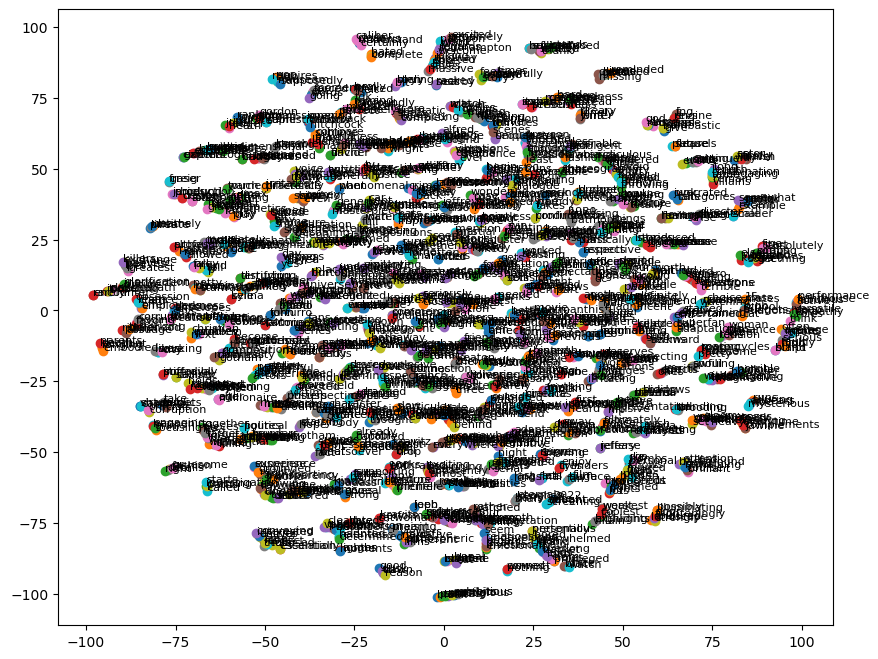

In [25]:
# Write your code here
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load your dataset from Assignment Two (replace 'your_dataset.csv' with your actual file)
dataset = pd.read_csv('film_reviews.csv')

# Preprocess the text data (you may need to modify this based on your preprocessing in Assignment Two)
def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word.isalnum() and word not in stop_words]

    return words

# Apply text preprocessing to each document
tokenized_documents = dataset['Review Text'].apply(preprocess_text)

# Train Word2Vec model
embedding_model = Word2Vec(sentences=tokenized_documents, vector_size=300, window=5, min_count=1, workers=4)

# Save the model for future use if needed
embedding_model.save("word2vec_model.model")

# Visualize the word embeddings using t-SNE
def visualize_word_embeddings(model, documents):
    # Flatten the list of tokenized documents
    flattened_words = [word for doc in documents for word in doc]

    # Extract unique words to visualize
    unique_words = list(set(flattened_words))
    # Filter out words not present in the model's vocabulary
    valid_words = [word for word in unique_words if word in model.wv.key_to_index]
    word_vectors = np.array([model.wv[word] for word in valid_words]) 

    #word_vectors = np.array([model.wv[word] for word in unique_words])  # Convert to NumPy array

    # Reduce perplexity to a smaller value
    tsne_model = TSNE(n_components=2, perplexity=3, random_state=42)
    word_vectors_2D = tsne_model.fit_transform(word_vectors)

    # Create a DataFrame for visualization
    df = pd.DataFrame(data={'word': unique_words, 'x': word_vectors_2D[:, 0], 'y': word_vectors_2D[:, 1]})


    # Plot the word embeddings
    plt.figure(figsize=(10, 8))
    for i, row in df.iterrows():
        plt.scatter(row['x'], row['y'])
        plt.text(row['x'], row['y'], row['word'], fontsize=8)

    plt.show()

# Visualize word embeddings for some example words
example_words = ['movie', 'plot', 'character', 'entertaining', 'disappointing']
visualize_word_embeddings(embedding_model, tokenized_documents)






# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file



# Link:

https://github.com/SoumyaNanditha/SoumyaNanditha_INFO5731_-Fall2023/blob/main/annotated_film_reviews.csv 

